<a href="https://colab.research.google.com/github/prathameshbhalekar/Deep-Learning-With-Tensorflow/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [0]:
!pip install -q git+https://github.com/tensorflow/docs

In [0]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
df=pd.read_csv(dataset_path,names=column_names,sep=' ',na_values='?',skipinitialspace=True,comment='\t')
df.dropna(subset=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight','Acceleration', 'Model Year', 'Origin'],inplace=True)
df['Europe']=0
df['USA']=0
df['Japan']=0
l,_=df.shape
print(l)
for i in range(l):
    # print(df.Origin.get(i))
    if(df.Origin.get(i)==1):
      df.at[i,'USA']=1
    if(df.Origin.get(i)==2):
      df.at[i,'Europe']=1
    if(df.Origin.get(i)==3):
      df.at[i,'Japan']=1

df=df.drop("Origin",1)
train_featureset,test_featureset=train_test_split(df,test_size=0.2)
train_values=train_featureset.MPG
train_featureset=train_featureset.drop("MPG",1)
test_values=test_featureset.MPG
test_featureset=test_featureset.drop("MPG",1)

train_featureset=(train_featureset-train_featureset.mean())/train_featureset.std()
test_featureset=(test_featureset-test_featureset.mean())/test_featureset.std()
print(train_featureset)


392
     Cylinders  Displacement  Horsepower  ...    Europe       USA     Japan
271  -0.856248     -0.356661    0.030940  ... -0.460974  0.803306 -0.506169
270  -0.856248     -0.566483   -0.234378  ... -0.460974 -1.240879  1.969313
0     1.510248      1.083482    0.694233  ... -0.460974  0.803306 -0.506169
312  -0.856248     -1.024277   -1.030331  ... -0.460974 -1.240879  1.969313
267  -0.856248     -0.566483   -0.234378  ... -0.460974 -1.240879  1.969313
..         ...           ...         ...  ...       ...       ...       ...
191   0.327000      0.301417   -0.101719  ... -0.460974  0.803306 -0.506169
90    1.510248      2.247041    2.498393  ... -0.460974  0.803306 -0.506169
376  -0.856248     -0.976590   -0.950735  ... -0.460974 -1.240879  1.969313
166   1.510248      1.035795    0.667702  ... -0.460974  0.803306 -0.506169
339  -0.856248     -0.404348   -0.526227  ... -0.460974  0.803306 -0.506169

[313 rows x 9 columns]


In [0]:
model=keras.Sequential(layers=[keras.layers.Dense(64,activation='relu',input_shape=[len(test_featureset.columns)]),
                               keras.layers.Dense(64,activation='relu'),
                               
                               keras.layers.Dense(1)])

optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

In [0]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_featureset, train_values, 
                    epochs=1000, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])
his=pd.DataFrame(history.history)



Epoch: 0, loss:5.4638,  mae:1.6940,  mse:5.4638,  val_loss:7.6384,  val_mae:2.0283,  val_mse:7.6384,  
................

         loss        mae         mse    val_loss    val_mae     val_mse  epoch
0  567.025513  22.460688  567.025513  513.228699  21.360329  513.228699      0
1  500.530792  20.982668  500.530792  455.172363  19.997555  455.172363      1
2  437.318939  19.487028  437.318939  393.090637  18.455187  393.090637      2
3  368.482025  17.771709  368.482025  326.673615  16.671127  326.673615      3
4  299.415222  15.850050  299.415222  263.435760  14.768339  263.435760      4


Text(0, 0.5, 'MAE [MPG]')

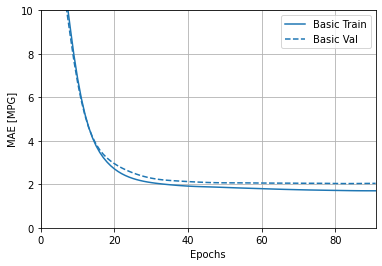

In [0]:
his['epoch']=history.epoch
print(his.head())
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

Text(0, 0.5, 'MSE [MPG^2]')

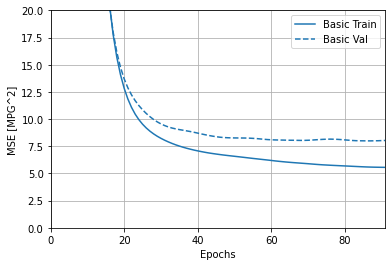

In [0]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [MPG^2]')

In [0]:

loss, mae, mse = model.evaluate(test_featureset, test_values, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 8.8823 - mae: 2.2322 - mse: 8.8823
Testing set Mean Abs Error:  2.23 MPG
